In [62]:
#Add Matplotlib inline magic command
%matplotlib inline
#Dependencies 
import matplotlib.pyplot as plt
import pandas as pd

In [63]:
#load the data into files
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [64]:
#create dictionaries for the data for cities
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [65]:
#create dictionary for ride data
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [66]:
#checking city data for number of rows that are not null, see if there is missing data
city_data_df.count() 

city            120
driver_count    120
type            120
dtype: int64

In [67]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [68]:
#Need datatypes of each row
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [69]:
#get unique values of city types
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [70]:
#get the number of data points from the urban cities
sum(city_data_df["type"] =='Urban')

66

In [71]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [72]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [73]:
#get datatypes for ride info
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [74]:
#combine to one dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left", on=["city", "city"])

#Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [75]:
#create the Urban city type DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [76]:
#create dataframe for suburban cities.
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df['type'] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [77]:
#get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(['city']).count()["ride_id"]
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [78]:
#getting count of rides for suburban and rural cities.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [79]:
#get average fare for each city in the urban cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [80]:
#average for suburban and rural cities
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [82]:
#get the driver count for urban cities
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()


city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [83]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

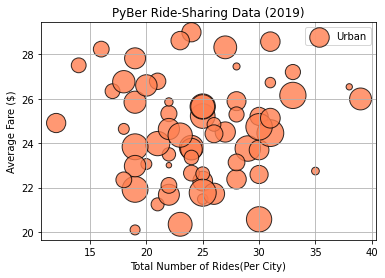

In [85]:
#create scatter plot for urban cities
plt.scatter(urban_ride_count,
            urban_avg_fare,
             s=10*urban_driver_count, c='coral',
           edgecolor='black', linewidths=1,
           alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides(Per City)")
plt.grid(True)
#Add the legend.
plt.legend()

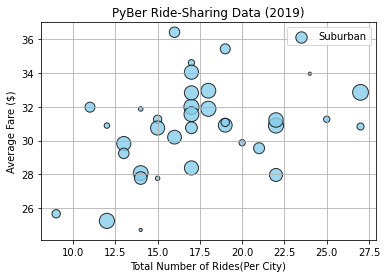

In [86]:
#create scatter plot for suburban cities
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
             s=10*suburban_driver_count, c='skyblue',
           edgecolor='black', linewidths=1,
           alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides(Per City)")
plt.grid(True)
#Add the legend.
plt.legend()

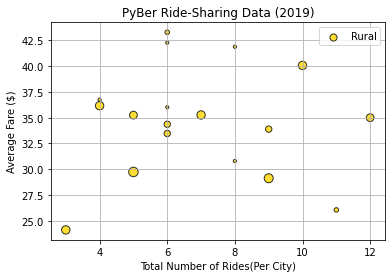

In [87]:
#create scatter plot for rural cities
plt.scatter(rural_ride_count,
            rural_avg_fare,
             s=10*rural_driver_count, c='gold',
           edgecolor='black', linewidths=1,
           alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides(Per City)")
plt.grid(True)
#Add the legend.
plt.legend()

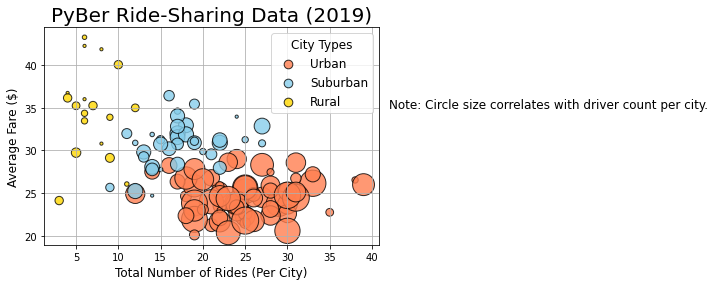

In [92]:
#combine all three charts into one, added chart attributes and text and save
plt.scatter(urban_ride_count, 
           urban_avg_fare,
           s=10*urban_driver_count, c='coral',
           edgecolor = 'black', linewidths = 1,
            alpha=0.8, label='Urban')

plt.scatter(suburban_ride_count,
            suburban_avg_fare,
             s=10*suburban_driver_count, c='skyblue',
           edgecolor='black', linewidths=1,
           alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
            rural_avg_fare,
             s=10*rural_driver_count, c='gold',
           edgecolor='black', linewidths=1,
           alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
lgnd = plt.legend(fontsize='12', mode="Expanded",
                 scatterpoints=1, loc='best', title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#Add the text box with note on circle size.
plt.text(42,35, "Note: Circle size correlates with driver count per city.", fontsize="12")

#save the plot
plt.savefig("analysis/Fig1.png")
# Show the plot
plt.show()

In [93]:
#get summary stats for urban cities
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [94]:
#summary stats for suburban
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [95]:
#summary stats for rural
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [96]:
#summary stats for urban ride count
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [97]:
#summary stats for suburban ride count
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [98]:
#summary stats for rural city count
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [102]:
#calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [103]:
#calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(), 2)

(24.0, 17.0, 6.0)

In [104]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode()


0    22
1    25
dtype: int64

In [105]:
# Calculate the mode of the ride count for the suburban cities.
suburban_ride_count.mode()


0    17
dtype: int64

In [106]:
# Calculate the mode of the ride count for the urban cities.
rural_ride_count.mode()


0    6
dtype: int64

In [107]:
#import numpy module for stats
import numpy as np
import scipy.stats as sts

In [109]:
#calculate the measures of central tendancy for the ride count of each city type
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count: .2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")


mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")


The mean for the ride counts for urban trips is  24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [110]:
#calculate the measures of central tendancy for the ride count of each city type
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_suburban_ride_count: .2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for urban trips is {median_suburban_ride_count}.")


mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_suburban_ride_count}.")


The mean for the ride counts for urban trips is  17.36.
The median for the ride counts for urban trips is 17.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([17]), count=array([7])).


In [111]:
#calculate the measures of central tendancy for the ride count of each city type
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count: .2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")


mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")


The mean for the ride counts for rural trips is  6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [112]:
#get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [117]:
#calculate the measures of central tendancy for urban fares.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares: .2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares: .2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is ${mode_urban_fares}.")


The mean fare price for urban trips is $ 24.53.
The median fare price for urban trips is $ 24.64.
The mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5])).


In [120]:
#get fares for suburban cities
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()


1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [121]:

#calculate the measures of central tendancy for suburban fares.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares: .2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares: .2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is ${mode_suburban_fares}.")


The mean fare price for suburban trips is $ 30.97.
The median fare price for suburban trips is $ 30.75.
The mode fare price for suburban trips is $ModeResult(mode=array([17.99]), count=array([3])).


In [122]:
#get fares for rural cities
rural_fares = rural_cities_df["fare"]
rural_fares.head()


2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [123]:
#calculate the measures of central tendancy for suburban fares.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares: .2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares: .2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is ${mode_rural_fares}.")


The mean fare price for rural trips is $ 34.62.
The median fare price for rural trips is $ 37.05.
The mode fare price for rural trips is $ModeResult(mode=array([37.05]), count=array([2])).


In [125]:
#get number of drivers for suburban cities
suburban_drivers = suburban_cities_df["driver_count"]
suburban_drivers.head()

#get number of drivers for urban cities
urban_drivers = urban_cities_df["driver_count"]
urban_drivers.head()

#get number of drivers for rural cities
rural_drivers = rural_cities_df["driver_count"]
rural_drivers.head()


2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [129]:
#calculate the measures of central tendancy for urban drivers.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of drivers for urban trips is {mean_urban_drivers: .1f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median number of drivers for urban trips is {median_urban_drivers: .1f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode number of drivers for urban trips is {mode_urban_drivers}.")


The mean number of drivers for urban trips is  36.7.
The median number of drivers for urban trips is  37.0.
The mode number of drivers for urban trips is ModeResult(mode=array([39]), count=array([86])).


In [130]:
#calculate the measures of central tendancy for suburban drivers.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean number of drivers for suburban trips is {mean_suburban_drivers: .1f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median number of drivers for suburban trips is {median_suburban_drivers: .1f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode number of drivers for suburban trips is {mode_suburban_drivers}.")


The mean number of drivers for suburban trips is  13.7.
The median number of drivers for suburban trips is  16.0.
The mode number of drivers for suburban trips is ModeResult(mode=array([20]), count=array([79])).


In [131]:
#calculate the measures of central tendancy for urban fares.
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number of drivers for rural trips is {mean_rural_drivers: .1f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median number of drivers for rural trips is {median_rural_drivers: .1f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode number of drivers for rural trips is {mode_rural_drivers}.")


The mean number of drivers for rural trips is  4.3.
The median number of drivers for rural trips is  4.0.
The mode number of drivers for rural trips is ModeResult(mode=array([1]), count=array([32])).


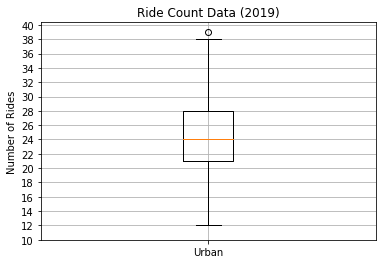

In [132]:
#create box and whiskers plot for urban cities ride count.
x_labels = ["Urban"]
fig, ax=plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
#Add the title, y-axis lable and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,41, step=2.0))
ax.grid()
plt.show()

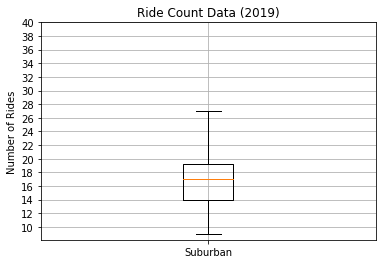

In [133]:
#create box and whiskers plot for urban cities ride count.
x_labels = ["Suburban"]
fig, ax=plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
#Add the title, y-axis lable and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,41, step=2.0))
ax.grid()
plt.show()

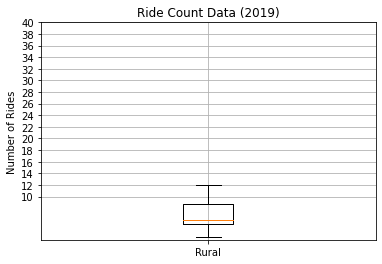

In [134]:
#create box and whiskers plot for urban cities ride count.
x_labels = ["Rural"]
fig, ax=plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
#Add the title, y-axis lable and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,41, step=2.0))
ax.grid()
plt.show()

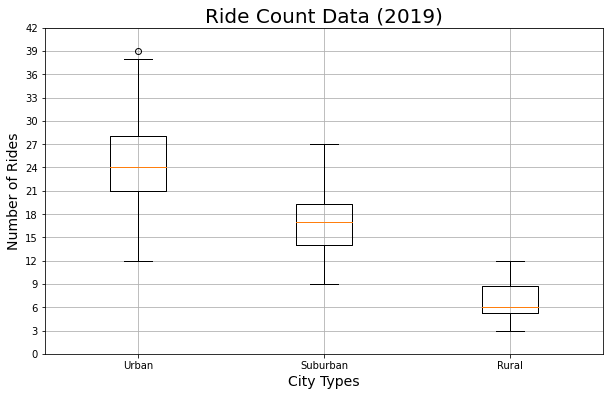

In [135]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [136]:
#Get the city that has the 39 outlier in urban cities.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


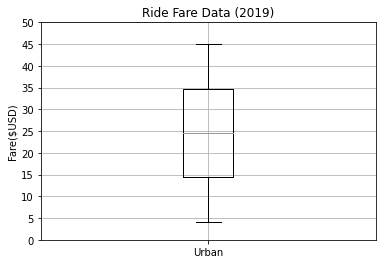

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [137]:
#create box and whisker plot for urban fare data.
x_labels = ["Urban"]
fix,ax = plt.subplots()
ax.boxplot(urban_fares,labels = x_labels)
#Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

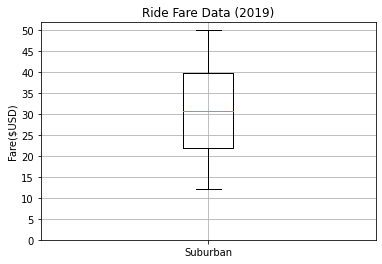

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [138]:
#create box and whisker plot for suburban fare data.
x_labels = ["Suburban"]
fix,ax = plt.subplots()
ax.boxplot(suburban_fares,labels = x_labels)
#Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

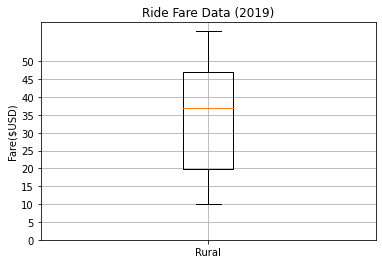

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [139]:
#create box and whisker plot for rural fare data.
x_labels = ["Rural"]
fix,ax = plt.subplots()
ax.boxplot(rural_fares,labels = x_labels)
#Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

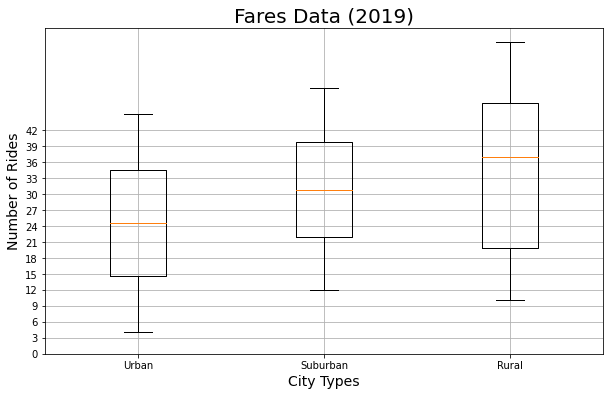

In [150]:
#create box and whisker with fare all three city types on one graph
x_labels = ["Urban", "Suburban","Rural"]
fares_count_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Fares Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(fares_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

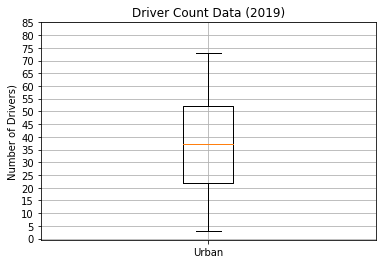

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [141]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

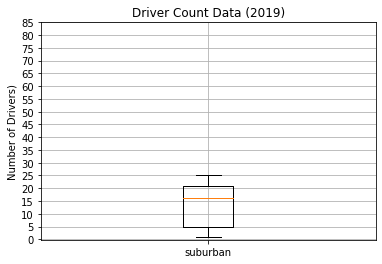

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [143]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

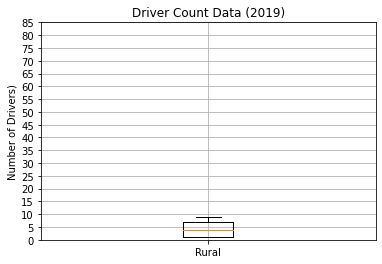

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [144]:
# Create the box-and-whisker plot for the rural driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

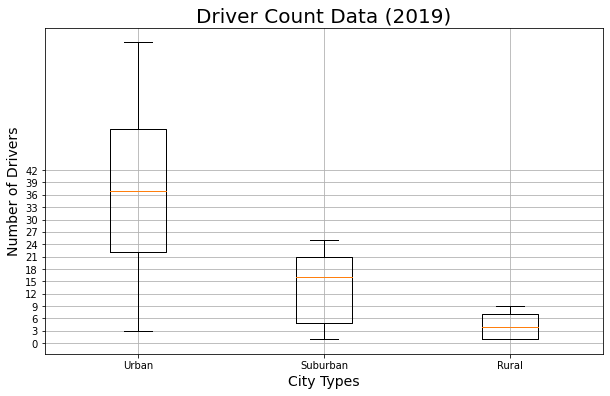

In [151]:
#create box and whisker with driver counts for all three city types on one graph
x_labels = ["Urban", "Suburban","Rural"]
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(driver_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()

In [152]:
#calc the sum of total fares for each city
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [154]:
#get total fares for all cities
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [155]:
#get percentage of fares by city type.
type_percents = 100* sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

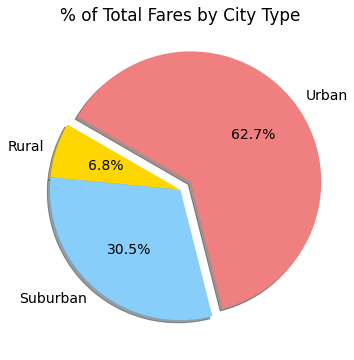

In [161]:
#build percentage of fares pie chart
#import mpl to change configurations in pie chart, using rcParams.
import matplotlib as mpl

#build pie chart
plt.subplots(figsize=(10,6))
plt.pie(type_percents,
        labels=["Rural","Suburban","Urban"],
        colors = ["gold", "lightskyblue", "lightcoral"],
        explode = [0,0,0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
#change the default font
mpl.rcParams['font.size'] = 14
#save figure
plt.savefig("analysis/Fig5.png")
#Show figure
plt.show()

In [165]:
#calc the sum of rides by type
sum_rides_by_type = pyber_data_df.groupby(['type']).count()["ride_id"]
sum_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [170]:
#get total rides by all cities
total_rides = pyber_data_df["ride_id"].count()
total_rides

2375

In [172]:
#get percentages by city type
ride_percents = 100* sum_rides_by_type / total_rides
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

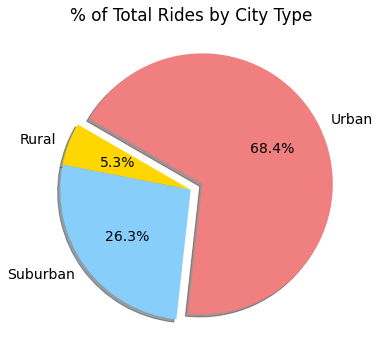

In [173]:
#build percentage of rides pie chart
#import mpl to change configurations in pie chart, using rcParams.
import matplotlib as mpl

#build pie chart
plt.subplots(figsize=(10,6))
plt.pie(ride_percents,
        labels=["Rural","Suburban","Urban"],
        colors = ["gold", "lightskyblue", "lightcoral"],
        explode = [0,0,0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
#change the default font
mpl.rcParams['font.size'] = 14
#save figure
plt.savefig("analysis/Fig6.png")
#Show figure
plt.show()

In [175]:
#calc total drivers by type
sum_drivers_by_type = pyber_data_df.groupby(["type"]).sum()["driver_count"]
sum_drivers_by_type

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [177]:
#get total number of drivers 
total_drivers = pyber_data_df["driver_count"].sum()
total_drivers

68709

In [178]:
#percentage drivers by type
drivers_percents = 100 * sum_drivers_by_type / total_drivers
drivers_percents

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

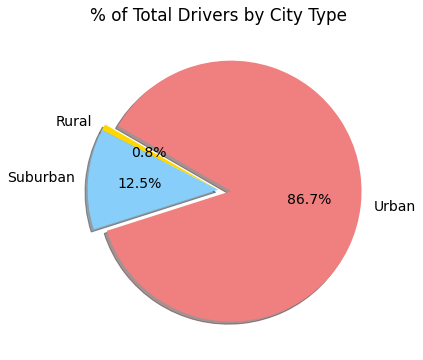

In [179]:
#build pie chart for drivers by type

#import mpl to change configurations in pie chart, using rcParams.
import matplotlib as mpl

#build pie chart
plt.subplots(figsize=(10,6))
plt.pie(drivers_percents,
        labels=["Rural","Suburban","Urban"],
        colors = ["gold", "lightskyblue", "lightcoral"],
        explode = [0,0,0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")
#change the default font
mpl.rcParams['font.size'] = 14
#save figure
plt.savefig("analysis/Fig7.png")
#Show figure
plt.show()